## OIQ-Exam-Question-1 (Version 2)
Technical exam question from Ordre des ingénieurs du Québec.  Obviously meant to be done using moment-distribution, but even easier using slope-deflection.  This version use a newer 'sdutil' that also computes end shears.

In [1]:
from sympy import *
init_printing(use_latex='mathjax')
from IPython import display

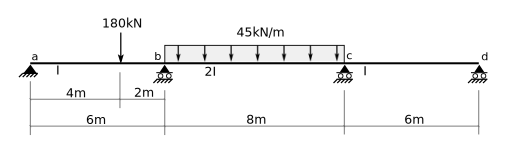

In [2]:
display.SVG('oiq-exam-1.svg')

In [3]:
from sdutil2 import SD, FEF
var('EI theta_a theta_b theta_c theta_d')
Mab,Mba,Vab,Vba = SD(6,EI,theta_a,theta_b) + FEF.p(6,180,4)
Mbc,Mcb,Vbc,Vcb = SD(8,2*EI,theta_b,theta_c) + FEF.udl(8,45)
Mcd,Mdc,Vcd,Vdc = SD(6,EI,theta_c,theta_d)

Solve equilbrium equations for rotations:

In [4]:
soln = solve( [Mab,Mba+Mbc,Mcb+Mcd,Mdc],[theta_a,theta_b,theta_c,theta_d] )
soln

⎧    75.0       90.0       -190.0        95.0⎫
⎨θₐ: ────, θ_b: ────, θ_c: ───────, θ_d: ────⎬
⎩     EI         EI           EI          EI ⎭

Member end moments:

In [5]:
[m.subs(soln) for m in [Mab,Mba,Mbc,Mcb,Mcd,Mdc]]

[0, 245.0, -245.0, 95.0, -95.0, 0]

Member end shears:

In [6]:
[v.subs(soln).n(4) for v in [Vab,Vba,Vbc,Vcb,Vcd,Vdc]]

[19.17, -160.8, 198.8, -161.3, 15.83, 15.83]

Reactions:

In [7]:
Ra = Vab
Rb = Vbc - Vba
Rc = Vcd - Vcb
Rd = -Vdc
[r.subs(soln).n(4) for r in [Ra,Rb,Rc,Rd]]

[19.17, 359.6, 177.1, -15.83]

#### Check overal equilibrium

In [8]:
# sum forces in vertical dirn.
(Ra+Rb+Rc+Rd - 180 - 45*8).subs(soln)

0

In [9]:
# sum moments about left
(-Rb*6 - Rc*(6+8) -Rd*(6+8+6) + 180*4 + 45*8*(6 + 8/2.)).subs(soln)

0

In [10]:
Ra.expand()

  EI⋅θₐ   EI⋅θ_b                   
- ───── - ────── + 46.6666666666667
    6       6                      